<a href="https://colab.research.google.com/github/55766sufyan/aritifical_intelligence_chest_xray_pneumonia_semester5/blob/main/notebooks/Demonstration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


2. Load Your Trained Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/chest_xray_models/best_medium_cnn.h5'
model = load_model(model_path)

print("Model Loaded Successfully!")


Mounted at /content/drive


Model Loaded Successfully!


3. Recreate Test Generator (for evaluation)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/drive/MyDrive/datasets/chest_xray/test"

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


4. Evaluate Model on Test Set

In [5]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_generator)

print("Test Accuracy:", test_acc)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test Loss:", test_loss)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.9056 - loss: 0.2585 - precision: 0.5687 - recall: 0.5787
Test Accuracy: 0.8733974099159241
Test Precision: 0.9405099153518677
Test Recall: 0.8512820601463318
Test Loss: 0.2999120354652405


5. Create Confusion Matrix

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 879ms/step


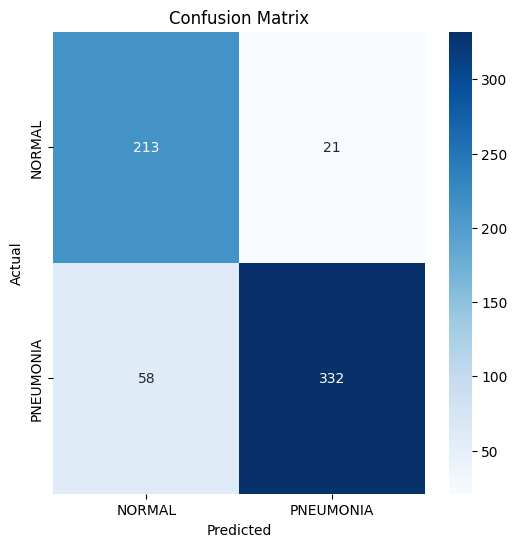

In [6]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NORMAL','PNEUMONIA'],
            yticklabels=['NORMAL','PNEUMONIA'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


6. Classification Report

In [7]:
print(classification_report(y_true, y_pred, target_names=['NORMAL','PNEUMONIA']))


              precision    recall  f1-score   support

      NORMAL       0.79      0.91      0.84       234
   PNEUMONIA       0.94      0.85      0.89       390

    accuracy                           0.87       624
   macro avg       0.86      0.88      0.87       624
weighted avg       0.88      0.87      0.87       624



7. Predict a Single Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step


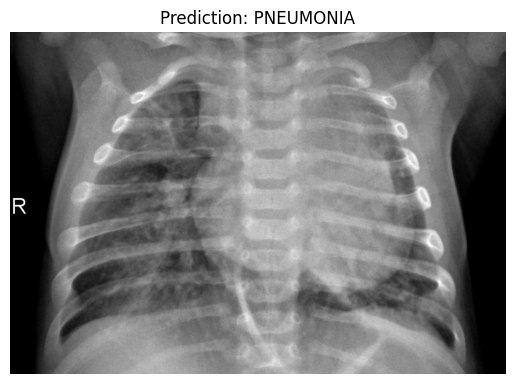

In [8]:
img_path = "/content/drive/MyDrive/datasets/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg"

img = image.load_img(img_path, target_size=(150,150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)[0][0]

plt.imshow(image.load_img(img_path))
plt.title("Prediction: " + ("PNEUMONIA" if prediction > 0.5 else "NORMAL"))
plt.axis("off")
plt.show()
